Digit_Classifier_using_KERAS

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.datasets import mnist
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [23]:
import pandas as pd
import numpy as np

In [24]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

In [25]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

In [26]:
X_train.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Visualization to check the Training data for each digit

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

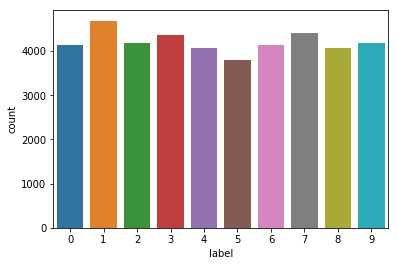

In [27]:
import seaborn as sns
f = sns.countplot(Y_train)
Y_train.value_counts()

In [28]:
import matplotlib.pyplot as plt
indec = 45
print(Y_train[indec])

6


In [29]:
X_train.shape, Y_train.shape

((42000, 784), (42000,))

In [30]:
test = pd.read_csv('../input/digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Normalization

In [31]:
X_train = X_train / 255.0
test = test / 255.0

Reshaping train and test data to suitable format to feed into neural network in acceptable form

In [32]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [33]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [35]:
model=Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [36]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [37]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [38]:
from keras.callbacks import ReduceLROnPlateau
LRR = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1,factor=0.5, min_lr=0.00001)

In [39]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [40]:
hist = model.fit(X_train,Y_train,epochs=20,batch_size = 100)

Epoch 1/20
37800/37800 [==============================] - 3s 91us/step - loss: 0.2700 - accuracy: 0.9149
Epoch 2/20
37800/37800 [==============================] - 3s 85us/step - loss: 0.0748 - accuracy: 0.9776
Epoch 3/20
37800/37800 [==============================] - 3s 79us/step - loss: 0.0561 - accuracy: 0.9835
Epoch 4/20
37800/37800 [==============================] - 3s 78us/step - loss: 0.0446 - accuracy: 0.9867
Epoch 5/20
37800/37800 [==============================] - 3s 78us/step - loss: 0.0384 - accuracy: 0.9886
Epoch 6/20
37800/37800 [==============================] - 3s 80us/step - loss: 0.0352 - accuracy: 0.9893
Epoch 7/20
37800/37800 [==============================] - 3s 77us/step - loss: 0.0328 - accuracy: 0.9894
Epoch 8/20
37800/37800 [==============================] - 3s 77us/step - loss: 0.0318 - accuracy: 0.9904
Epoch 9/20
37800/37800 [==============================] - 3s 78us/step - loss: 0.0282 - accuracy: 0.9916
Epoch 10/20
37800/37800 [==============================

In [41]:
model.evaluate(X_train,Y_train)

37800/37800 [==============================] - 3s 90us/step


[0.008989308589475865, 0.9973545074462891]

In [ ]:
model.save('Basic_Digit_Classifier.h5')